Resampling of initial conditions
======

We'll often want to change the resolution of a previous model that has been saved to disk. This short example shows how to do this for a set of temperature initial conditions mapped to a 32\*32 linear grid (elementType = "Q1/dQ0") made by **SavingLoadingFEVar.ipynb** and stored in the file "FEVariableSaveExample.out".


Firstly, load the usual functions.

In [1]:
import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np

Setup box size and resolutions
----

Note that *res* is the resolution of the saved FE variable file, while *newres* is the desired resolution after resampling. In this case we are taking an input that was 32\*32 and remapping down in resolution to a grid with 2 divisions in the x and z directions. Mapping up in resolution is just a case of changing the value of *newres*.

In [2]:
dim = 2
Box_Height = 1.0e0
Box_Length = 1.0 * Box_Height
BoxSize = (Box_Length, Box_Height)
res = 32
newres = 2

Create mesh objects for the original resolution

In [3]:
elementMesh = uw.mesh.FeMesh_Cartesian( elementType=("Q1/dQ0"), 
                                         elementRes=(res,res), 
                                           minCoord=(0.,0.), 
                                           maxCoord=BoxSize)
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh 

2


Plot representation of required mesh
----

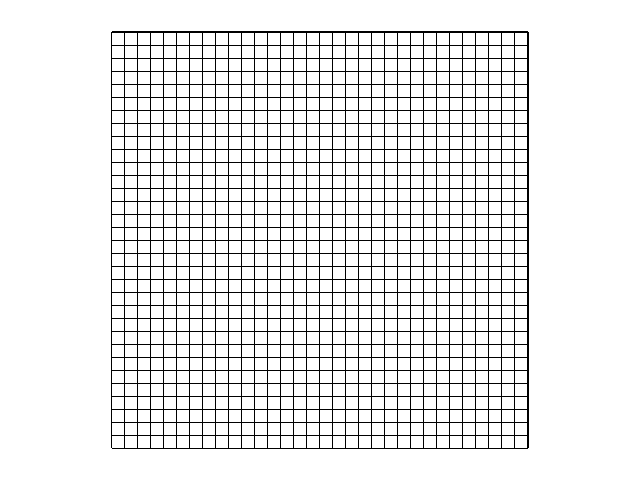

In [4]:
figMesh = plt.Figure()
figMesh.Mesh(linearMesh, colourBar=False)
figMesh.show()

Create a Finite Element (FE) variable for the temperature field

In [5]:
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

Load data from file
=====

Load the temperature field data from file with the original resolution.

In [6]:
temperatureField.load('FEVariableSaveExample.out')

Plot loaded temperature field
-----

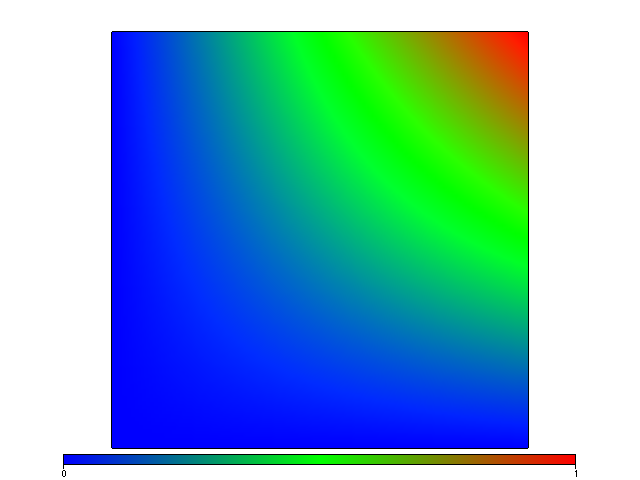

In [7]:
figtemp = plt.Figure()
figtemp.Surface(temperatureField, linearMesh, colours="blue green red")
figtemp.show()

Remesh initial conditions
=====

Remesh temperature field onto a new resolution. Mesh resolution set by *newres* variable defined above.

In [8]:
print 'Remeshing from a square grid of {0:3d} mesh points to {1:3d} mesh points'.format(res, newres)

Remeshing from a square grid of  32 mesh points to   2 mesh points


Create new mesh with *newres*.

In [9]:
elementMeshnew = uw.mesh.FeMesh_Cartesian( elementType=("Q1/dQ0"), 
                                         elementRes=(newres,newres), 
                                           minCoord=(0.,0.), 
                                           maxCoord=BoxSize)
linearMeshnew   = elementMeshnew
constantMeshnew = elementMeshnew.subMesh 

2


Plot new mesh
-----

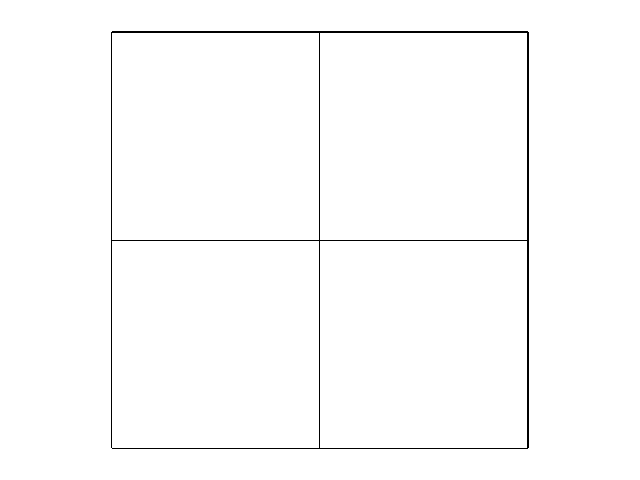

In [10]:
figMesh = plt.Figure()
figMesh.Mesh(linearMeshnew, colourBar=False)
figMesh.show()

Create new FE variable for the new temperature field.

In [11]:
temperatureFieldnew = uw.fevariable.FeVariable( feMesh=linearMeshnew,   nodeDofCount=1 )

Re-map values
=====

Re-map values from original temperature field data onto the new temperature field with the new mesh.

The line below passes the new mesh information, contained in *linearMeshnew*, into the evaluate function contained in the *temperatureField* structure. What this does is then evaluate the temperature value at each point in the new linear mesh. These values are then copied into the new temperature field data values, stored in *temperatureFieldnew*.

In [12]:
temperatureFieldnew.data[:] = temperatureField.evaluate(linearMeshnew)

Plot previous and remeshed temperature fields
======

These should look identical for sufficent resolution. The surface plotting function does use interpolation so low resolution will also look quite similar.

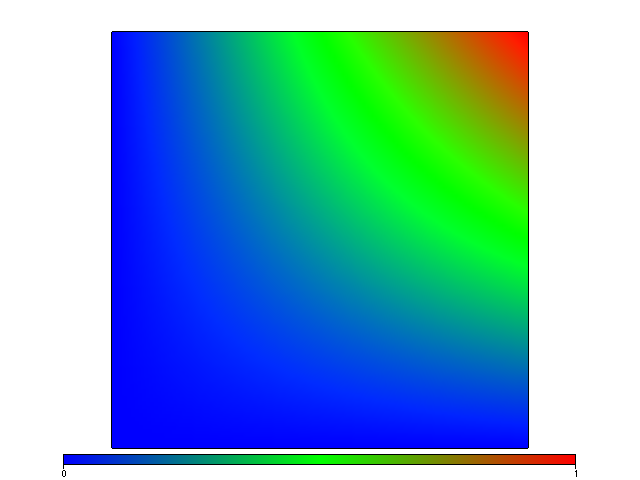

In [13]:
figtemp = plt.Figure()
figtemp.Surface(temperatureFieldnew, linearMesh, colours="blue green red")
figtemp.show()

So what changed?
======

Since the temperature field is remapped onto a new mesh, the values in space have not changed (much), but the way they are stored has. Firstly the size of the data arrays has changed from 65$^2$ (0-64 mesh points in a square grid) to (*newres*)$^2$. Secondly the exact data stored on a given index has changed. For example, say T[10] = 0.50 on the original mesh, but after re-meshing the index 10 might now refer to a value on the boundary of the new mesh, which might now give T[10] = 0. 

Both of these are demonstrated below.

In [14]:
print 'Previous temperature field data size was {0:3d}^2'.format(int(math.sqrt(len(temperatureField.data))))
print 'New temperature fielddata size is {0:3d}^2'.format(int(math.sqrt(len(temperatureFieldnew.data))))

Previous temperature field data size was  33^2
New temperature fielddata size is   3^2


In [15]:
if(res < newres):
    testpoint = int(res*res / 2)
    print 'Mid point of original mesh in original then new temperature variable:'
else:
    testpoint = int(newres*newres / 2)
    print 'Mid point of new (smaller) mesh in original then new temperature variable:'

# note that the [0] at the end retreves the value from the truple.
oldvalue = temperatureField.data[testpoint][0]
newvalue = temperatureFieldnew.data[testpoint][0]
print '  T_old({0:4d}) = {1:.3f}'.format(testpoint,oldvalue)
print '  T_new({0:4d}) = {1:.3f}'.format(testpoint,newvalue)

Mid point of new (smaller) mesh in original then new temperature variable:
  T_old(   2) = 0.000
  T_new(   2) = 0.000


These values will typically be different, depending on the actual values in the temperature field.